# Set carbon emission targets

In this notebook a target for the emission is set and the required tax rate is calculated. This involves inverting the model, and takes some time.  

# Parameters in this simulation 
Singapore won't solve. So it is excluded 


In [4]:
countries_of_interest = [country for country in masia.countries_ASEAN if country not in ['SGP']]
                         
instruments = [[f'{country}_GCARBR_A'] for country in countries_of_interest]
target_var  = [f'{country}_CO2' for country in countries_of_interest]
delay = 2
reduction_percent = 30 
countries_of_interest

['BRN', 'KHM', 'IDN', 'LAO', 'MYS', 'MMR', 'PHL', 'THA', 'VNM']

# Lets look at the impact of increasing the tax with \$10/tonne  in 2022

In [9]:
experiment = baseline.copy()
experiment.loc[2022,instrumentlist]= experiment.loc[2022,(instrumentlist := [i[0] for i in instruments])] + 10 
result = masia(experiment,progressbar = 0,silent=1)

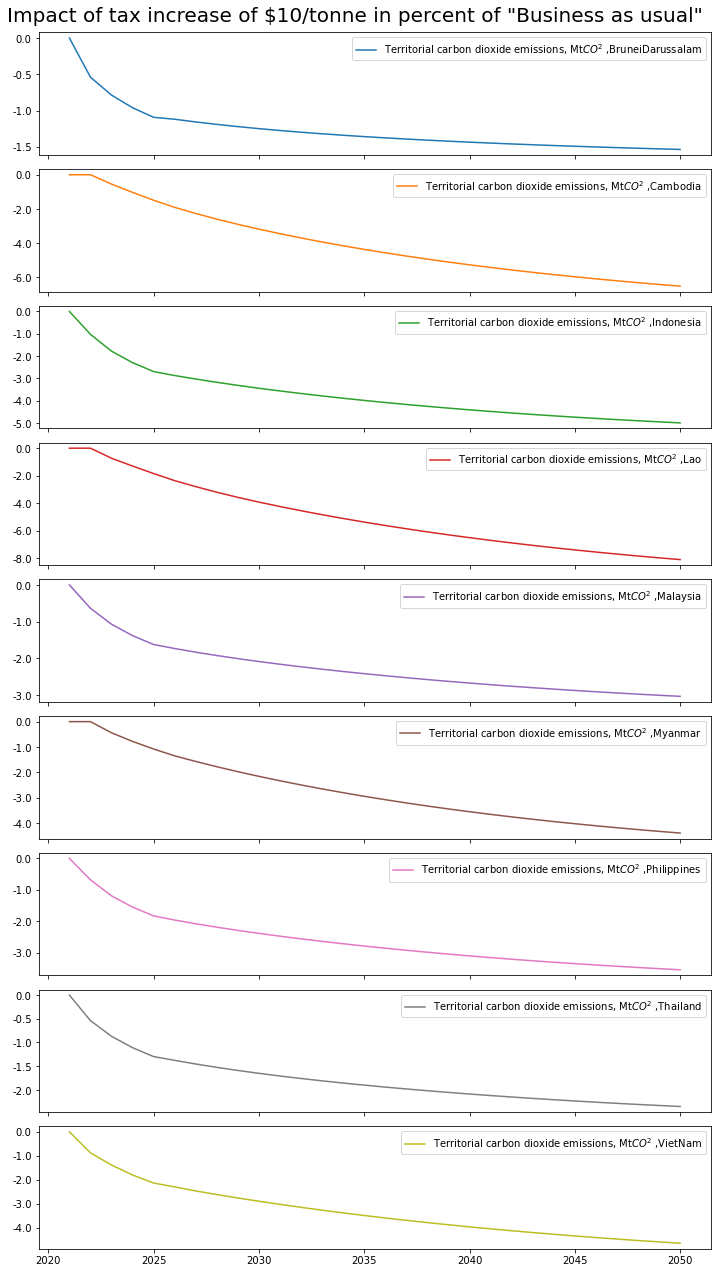

In [10]:
masia[target_var].difpctlevel.mul100.rename().plot(colrow  = 1,title = 'Impact of tax increase of \$10/tonne in percent of "Business as usual"  ',top=0.96,sharey=0,dec=2);
end_pct = masia[target_var].difpctlevel.mul100.df.loc[2050,:]
    

# The impact in selectet years  of increasing the tax with 10/tonne in 2022 in percent of BAU

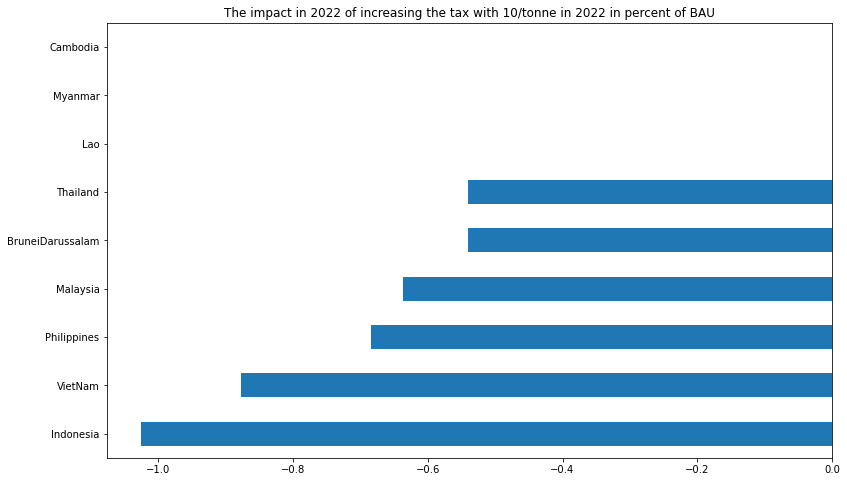

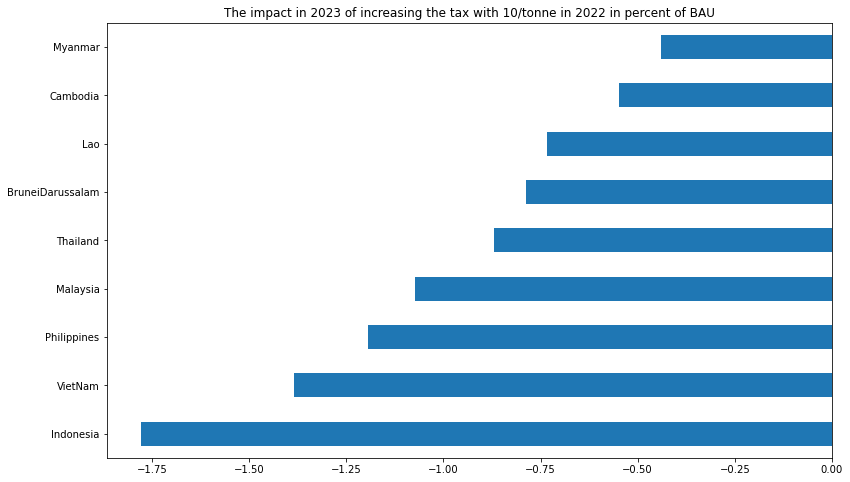

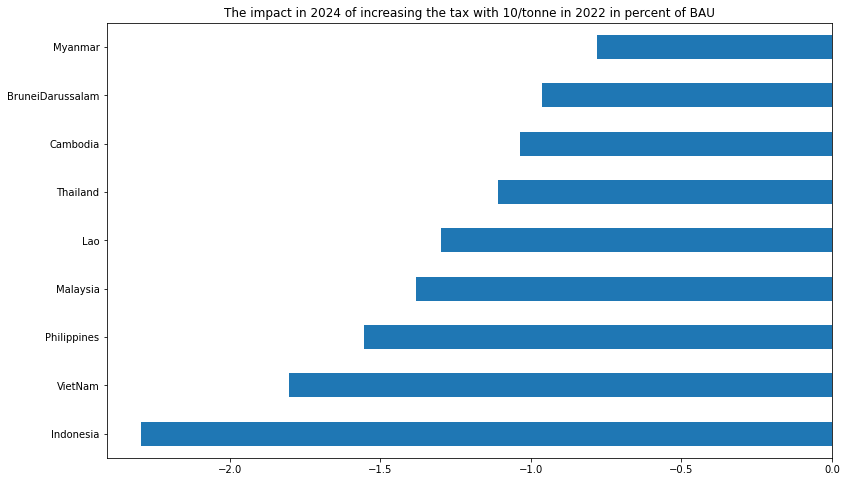

In [12]:

for year in [2022,2023,2024]:
    end_pct = masia[target_var].difpctlevel.mul100.df.loc[year,:]
    fig= end_pct.T.rename(masia.get_a_country).sort_values().plot(kind='barh',figsize = (13,8),title=f'The impact in {year} of increasing the tax with 10/tonne in 2022 in percent of BAU')
    plt.show()

# Define a dataframe with with target growth rates in $CO^2$

In [13]:
bau_2050 = baseline.loc[2050, target_var]
bau_2022  = baseline.loc[2022, target_var]

org_growthrate = (bau_2050/bau_2022)**(1/(2050-2022))
org_growthrate.name = 'Original growth rate'

target_2050 = bau_2050*(1-reduction_percent/100)
target_2050.name= 'target'

target_growthrate = (target_2050/bau_2022)**(1/(2050-2022))
target_growthrate.name = 'Target growth rate'



In [14]:
target_growth_values = list(target_growthrate.values)

In [15]:
target_before = baseline[target_var].loc[2022:,:]
calclines = '\n'.join(f'{t} = {t}(-1) * {v}' for t,v in zip(target_zzvar,target_growth_values))
target = target_before.mfcalc(calclines).loc[2022+delay:,:]

# Setup the Target/instrument device

In [20]:
t_i_baseline = baseline.copy()
t_i = targets_instruments(databank=t_i_baseline,targets=target,instruments=instruments,
                          model=masia,DefaultImpuls=10,defaultconv=0.5,varimpulse=True,nonlin=4,silent=1)

# Run the device. 
And fetch a cup of coffee. 
Serious calculations are to be performed

In [21]:
t_i.debug=0
res = t_i(delay=delay,shortfall=0)

# So close to the target
Below the difference between the target $co^2$ and the simulation result

In [28]:
masia.lastdf.loc[2050,target_var]-target.loc[2050,:]

BRN_CO2    0.010138
KHM_CO2   -0.002524
IDN_CO2    0.417973
LAO_CO2   -0.001921
MYS_CO2   -0.038593
MMR_CO2    0.006403
PHL_CO2    0.047163
THA_CO2    0.490442
VNM_CO2   -0.252282
Name: 2050, dtype: float64

# Emission and tax after inverting the model 

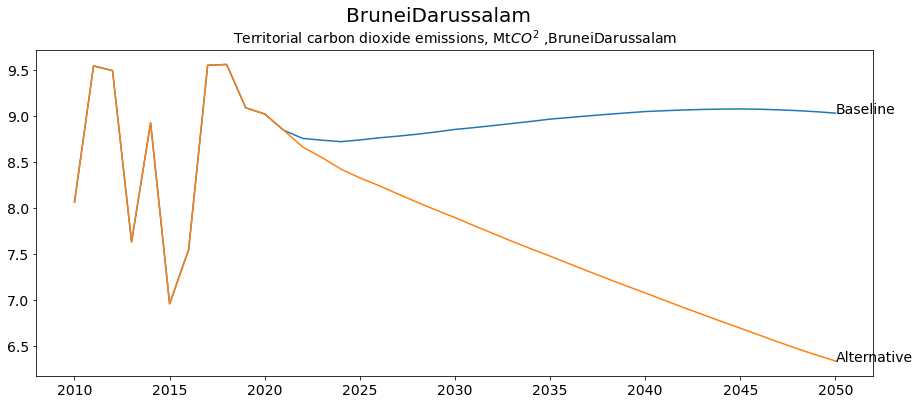

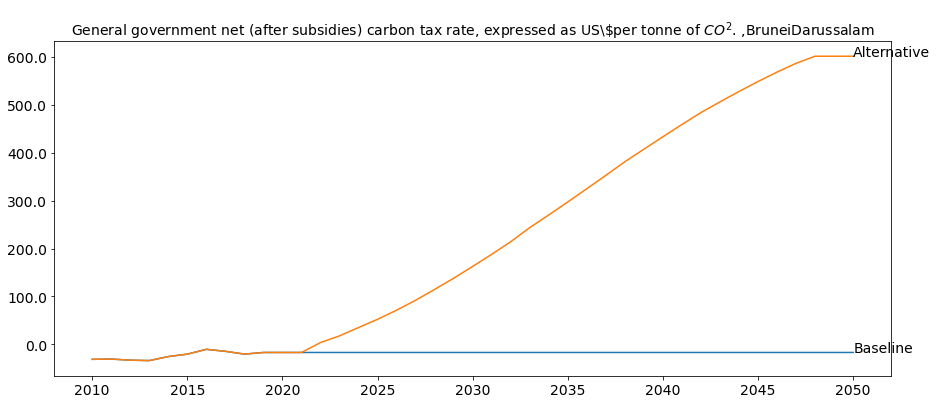

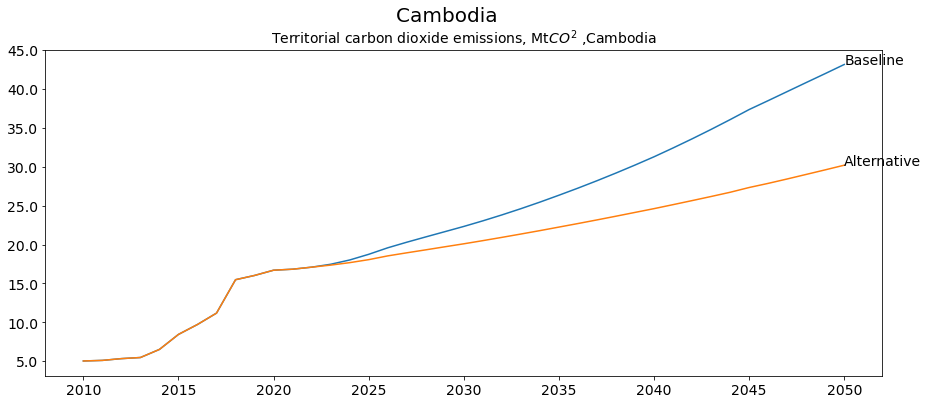

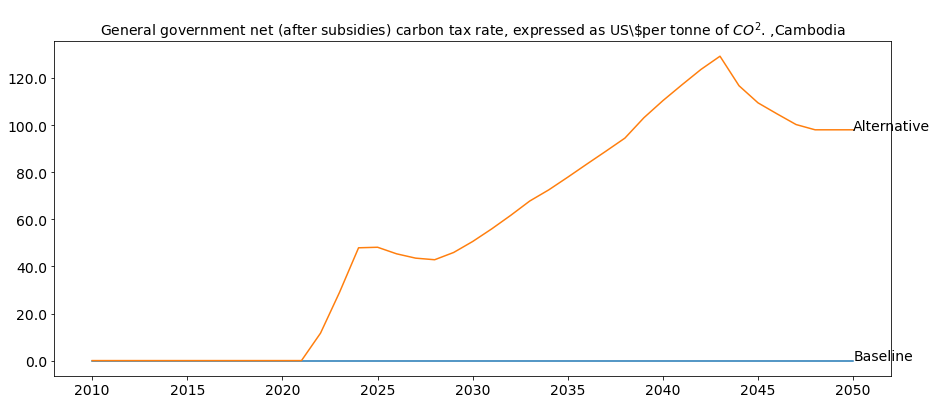

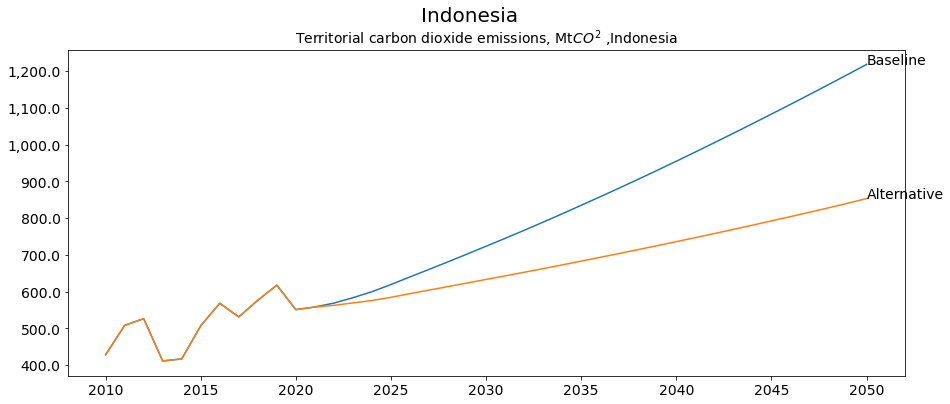

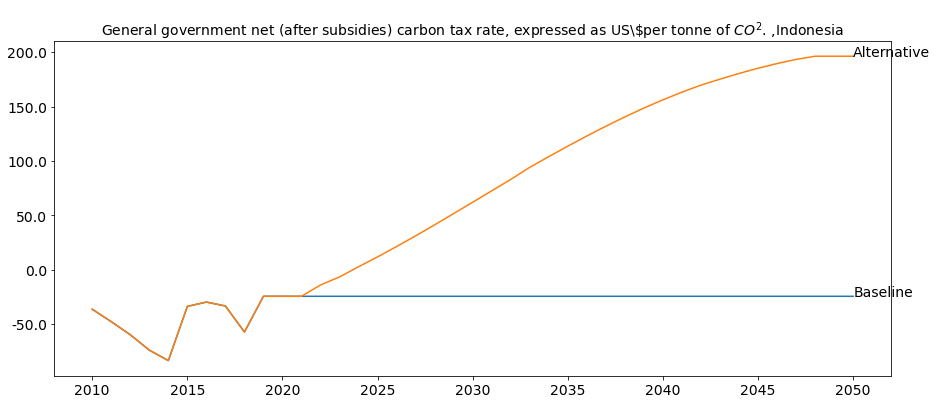

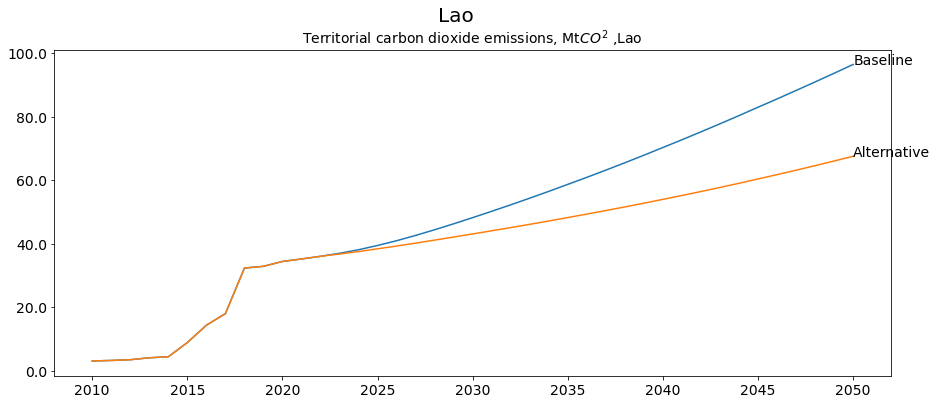

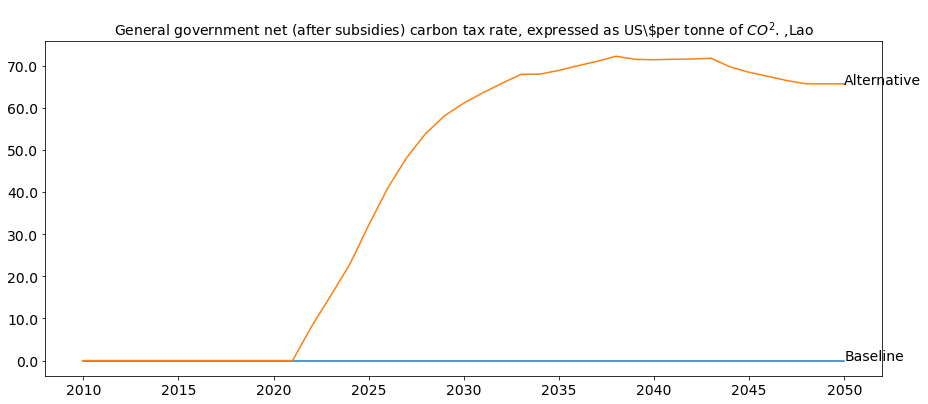

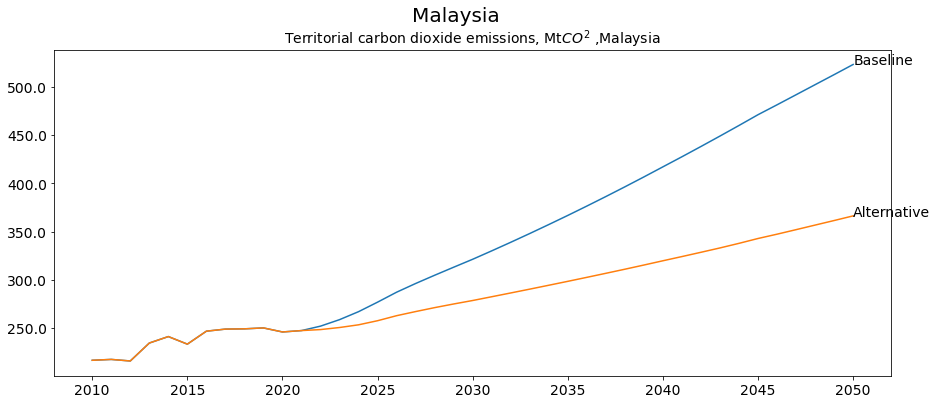

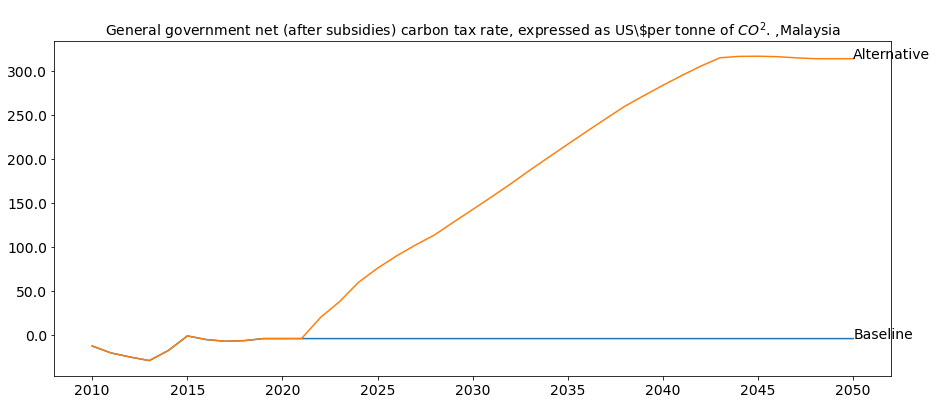

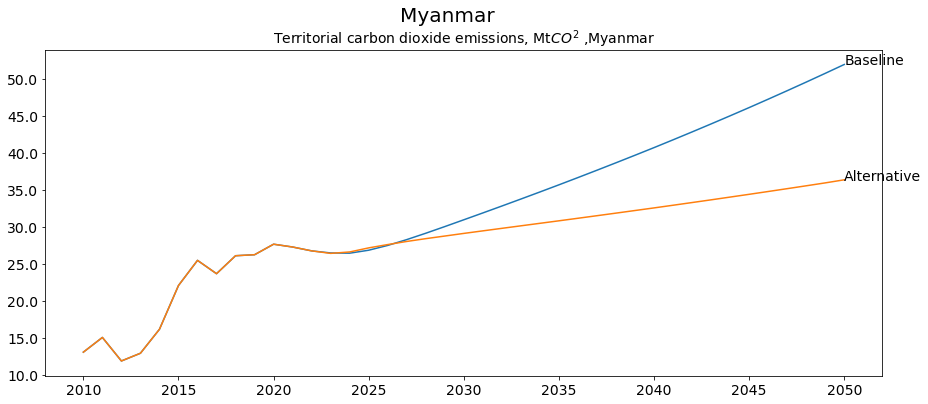

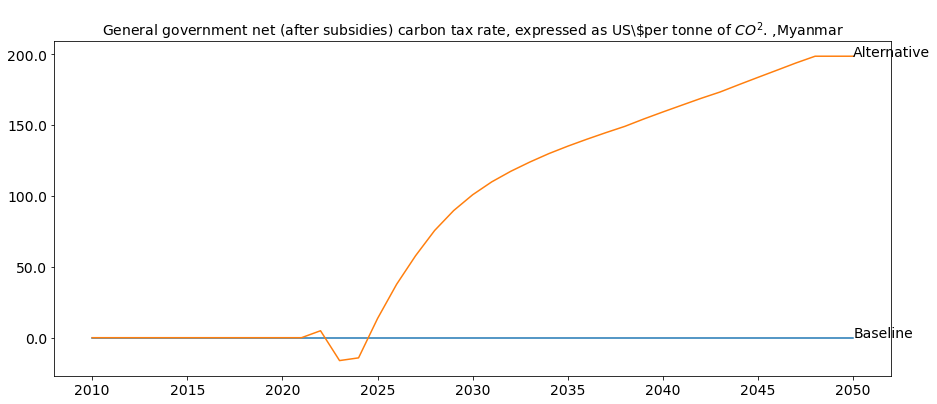

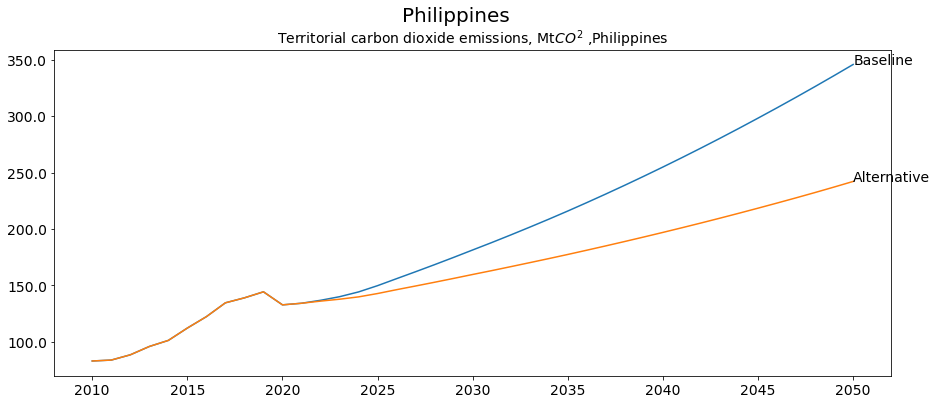

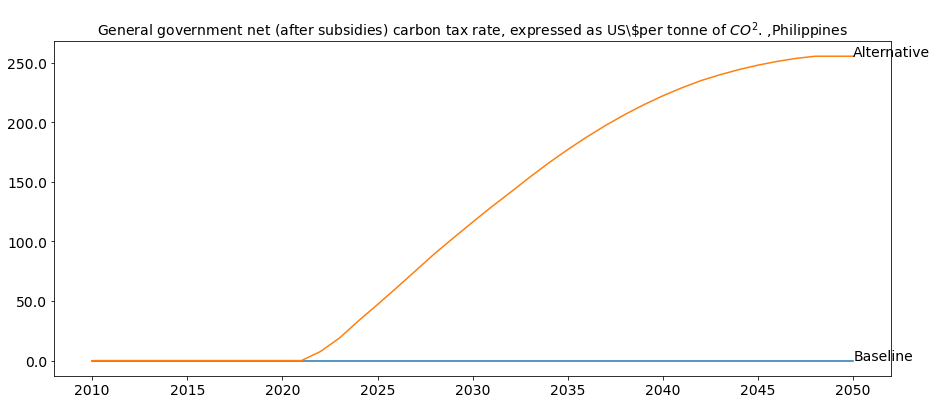

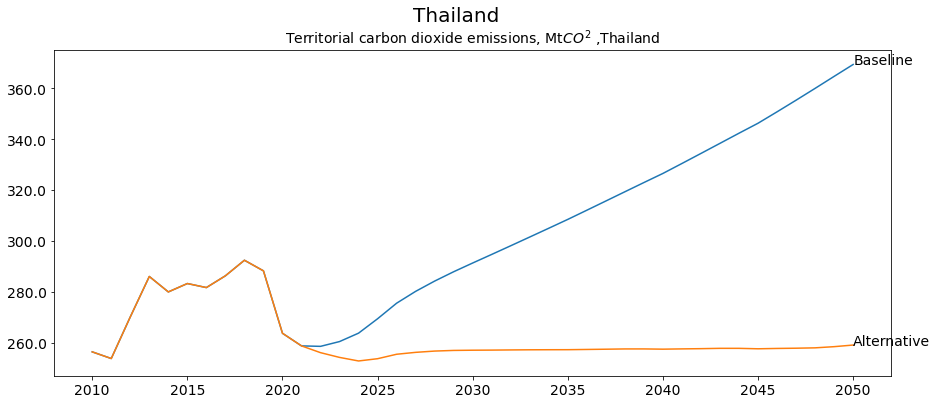

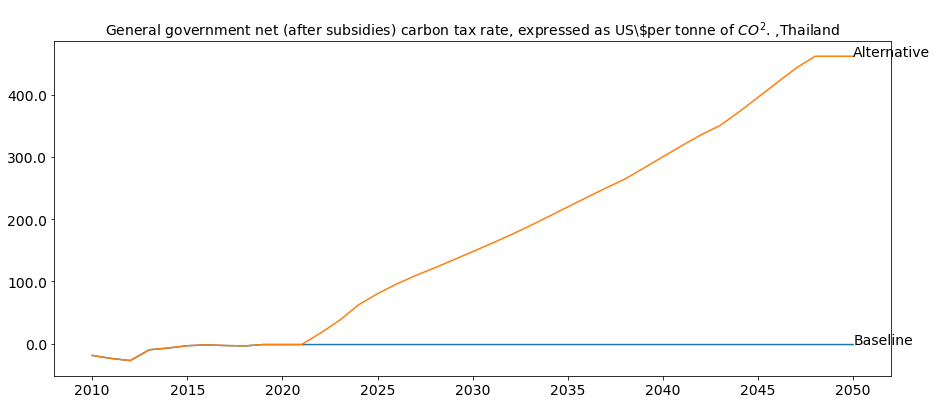

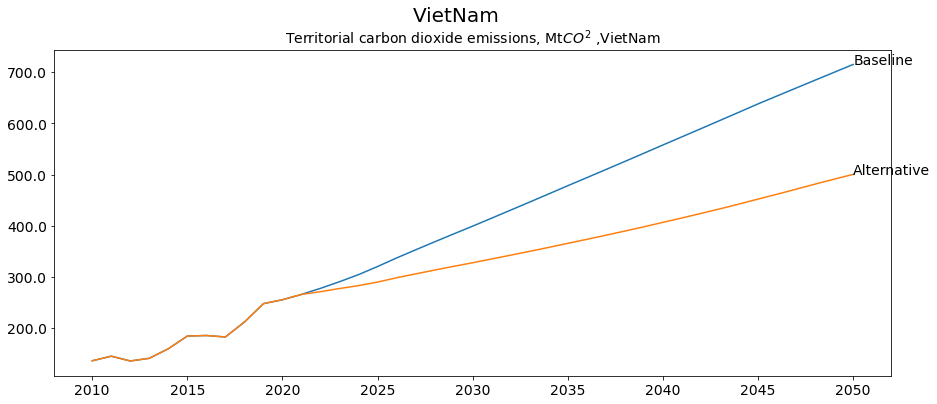

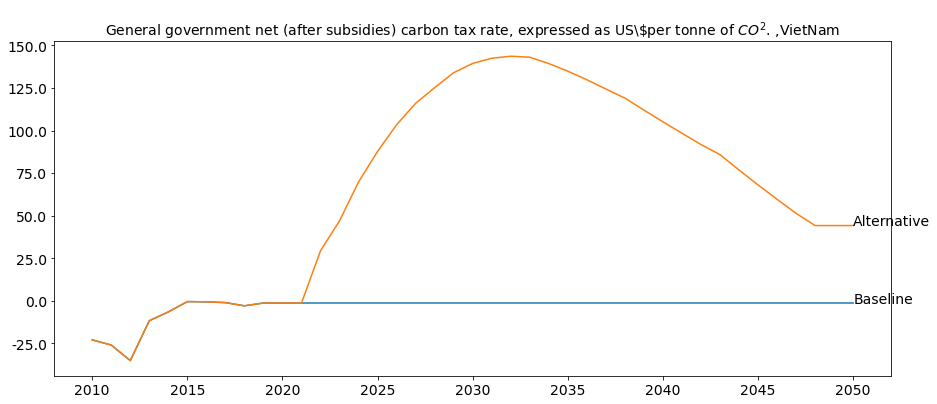

In [23]:
with masia.set_smpl(2010,2050):
    for country in countries_of_interest:
        masia[f'{country}_co2' ].plot_alt(title=f'{masia.iso_dict[country]} ',top=0.88);        
        masia[f'{country}_GCARBR' ].plot_alt(title=f' ',top=0.90);